In [2]:
!pip install -U bioinfokit

In [3]:
!pip install -U yellowbrick

In [4]:
!pip install -U statsmodels

In [7]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore") 

from bioinfokit.visuz import cluster
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
#  Loading data set 
df = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [10]:
# columns name
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [11]:
# dimension of the data
df.shape

(1453, 15)

In [12]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


# EDA

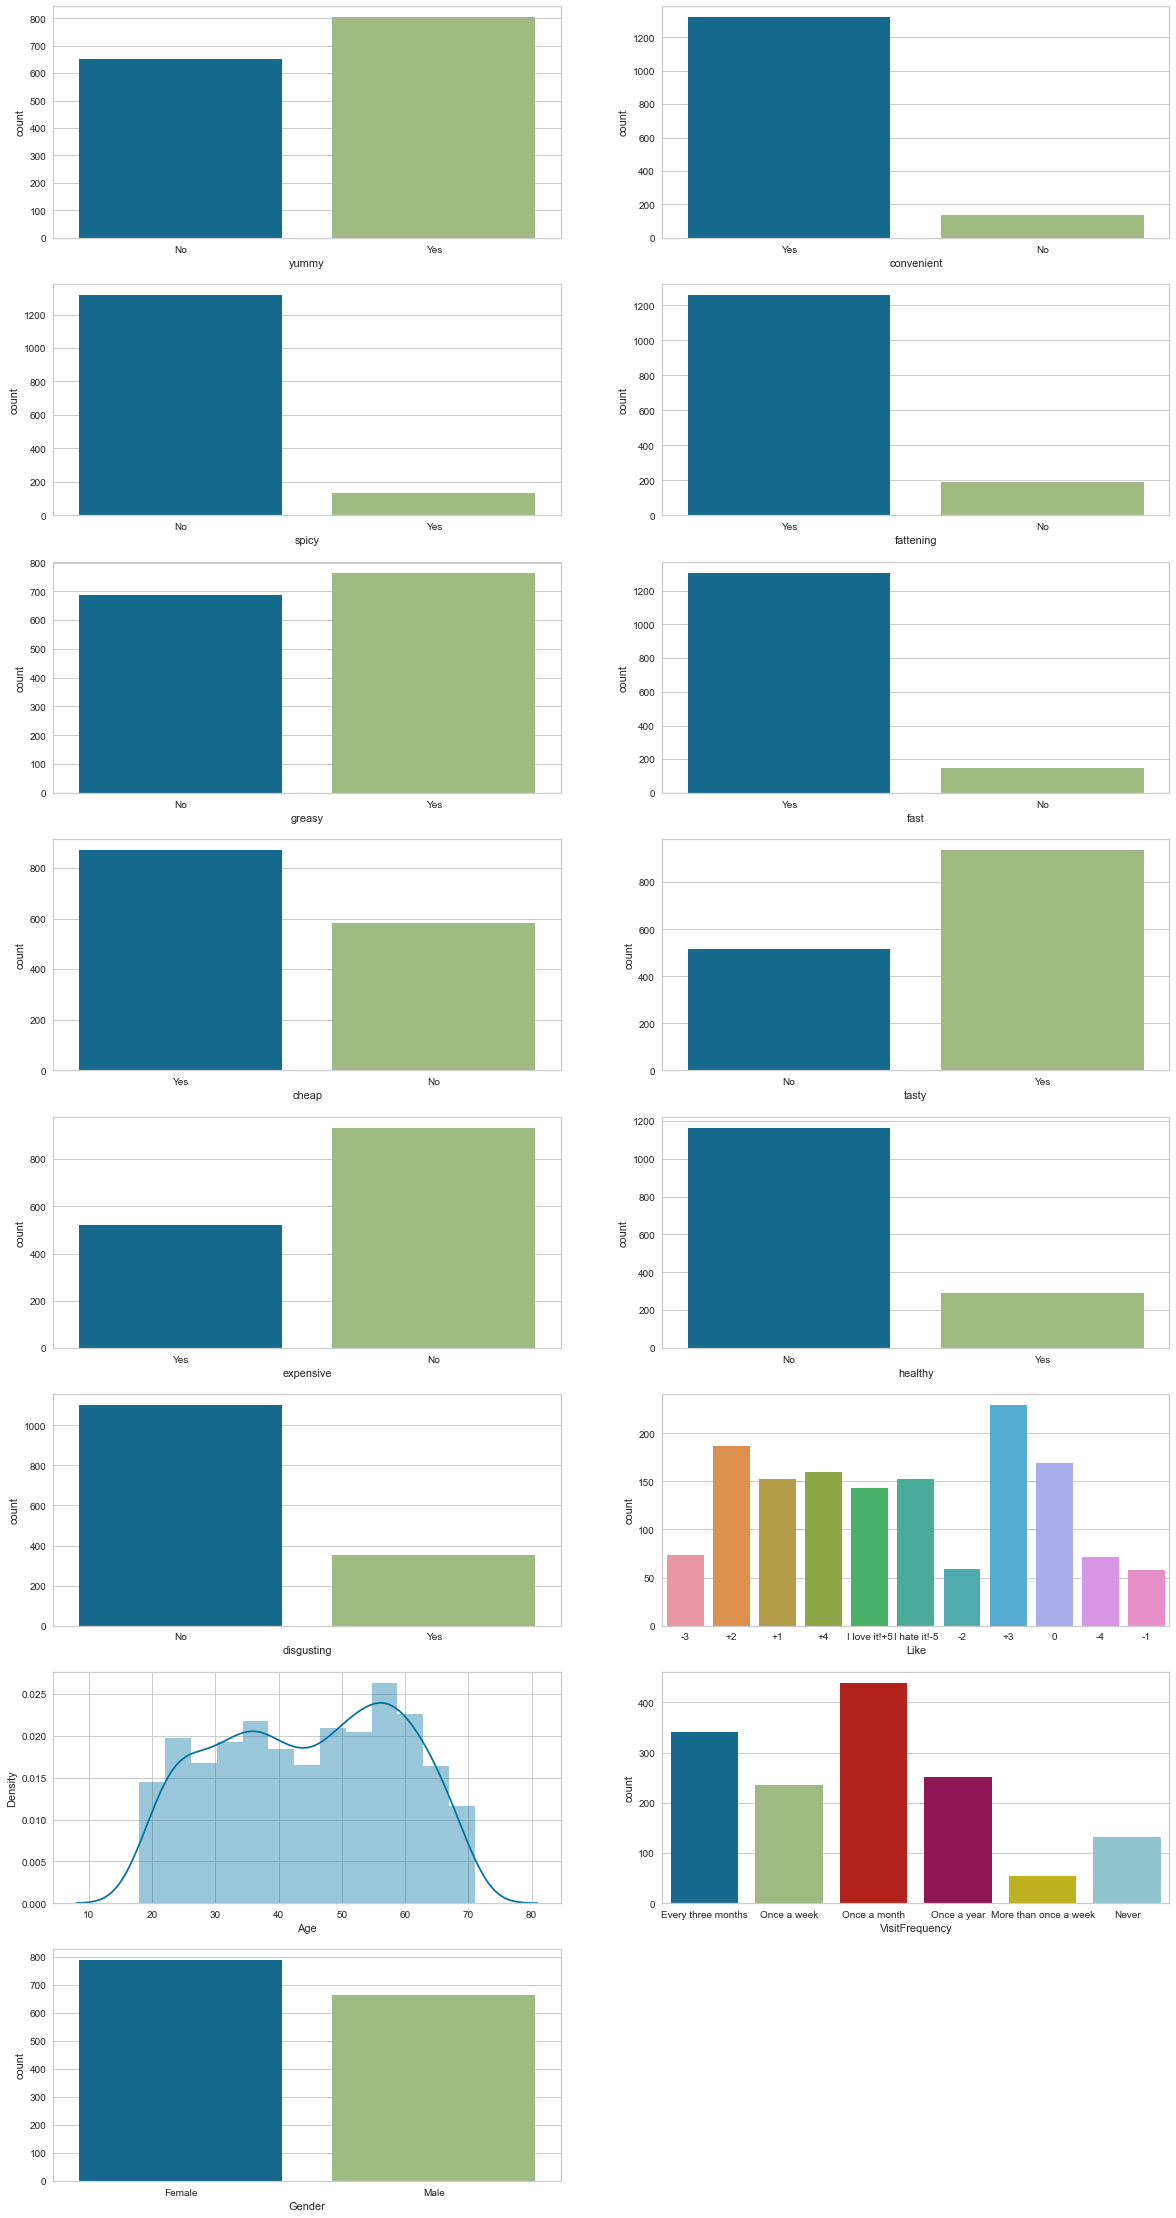

In [14]:
plt.figure(figsize = (20,40))
cat = []
con = []
x =1 
u = int((df.shape[1]+1)/2)

for i in df.columns:
    if(df[i].dtypes == "object"):
        cat.append(i)
        plt.subplot(u,2,x)
        x = x+1
        sns.countplot(df[i])
    else:
        con.append(i)
        plt.subplot(u,2,x)
        x = x+1
        sns.distplot(df[i])

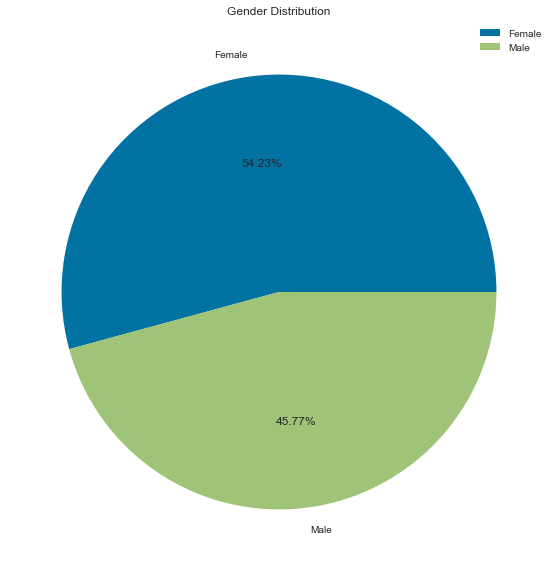

In [15]:
# Demographic 
# gender

plt.figure(figsize = (10, 10))
plt.pie(df["Gender"].value_counts(), labels = ["Female", "Male"], autopct = '%.2f%%')
plt.legend()
plt.title("Gender Distribution")
plt.show();

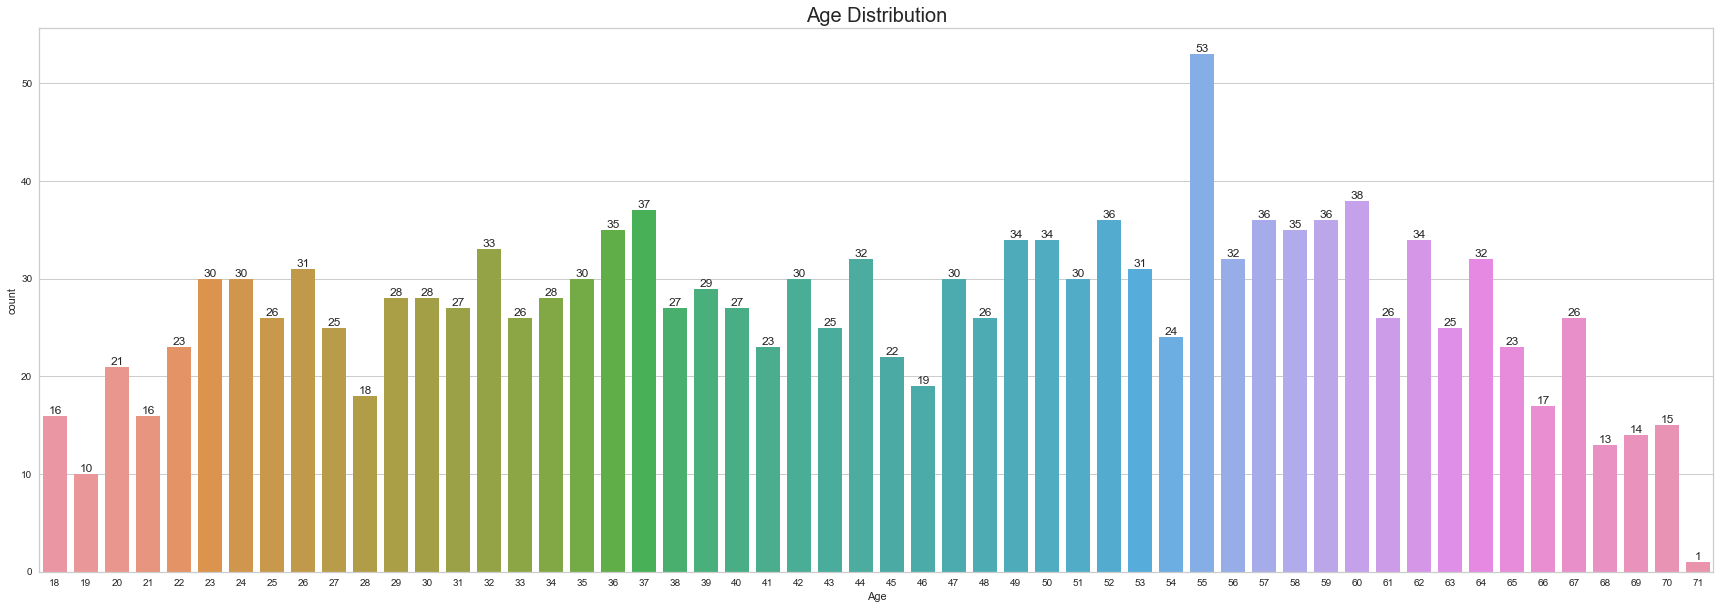

In [16]:
# Age Distribution 
plt.figure(figsize = (30,10))
data = sns.countplot(df["Age"])
data.bar_label(data.containers[0])
plt.title("Age Distribution", fontsize = 20)
plt.show();

# Data Preprocessing
as the like, Age, VisitFrequency, Gender are having binary features 
so we will perform "ordinal Encoding" for further model building 

In [17]:
df_new = df.drop(["Like", "Age", "VisitFrequency", "Gender"], axis = 1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [18]:
# ordinal Encoding 
ol = OrdinalEncoder()
df_new[list(df_new.columns)]= ol.fit_transform(df_new[list(df_new.columns)])

In [19]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


# Applying PCA

In [20]:
pca = PCA(n_components = 11)
pc = pca.fit_transform(df_new)
names = ["p1", "p2", "p3", "p4", "p5", "p6", "p7", "p8", "p9", "p10", "p11"]
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [21]:
pf.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,3.316151e-17,-1.860560e-17,1.001078e-17,-2.372500e-17,4.290366e-17,-3.247383e-18,2.433627e-17,2.021019e-17,-9.379207e-18,6.269360e-17,2.693418e-17
std,7.570495e-01,6.074556e-01,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274e+00,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-3.568482e-01,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-1.151632e-01,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,3.915540e-01,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130e+00,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


In [22]:
# variance 
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [23]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["pc"+str(i) for i in list(range(1, num_pc +1))]
loading_df = pd.DataFrame.from_dict(dict(zip (pc_list, loadings)))
loading_df["features"] = df_new.columns.values
loading_df = loading_df.set_index("features")
loading_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
features,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


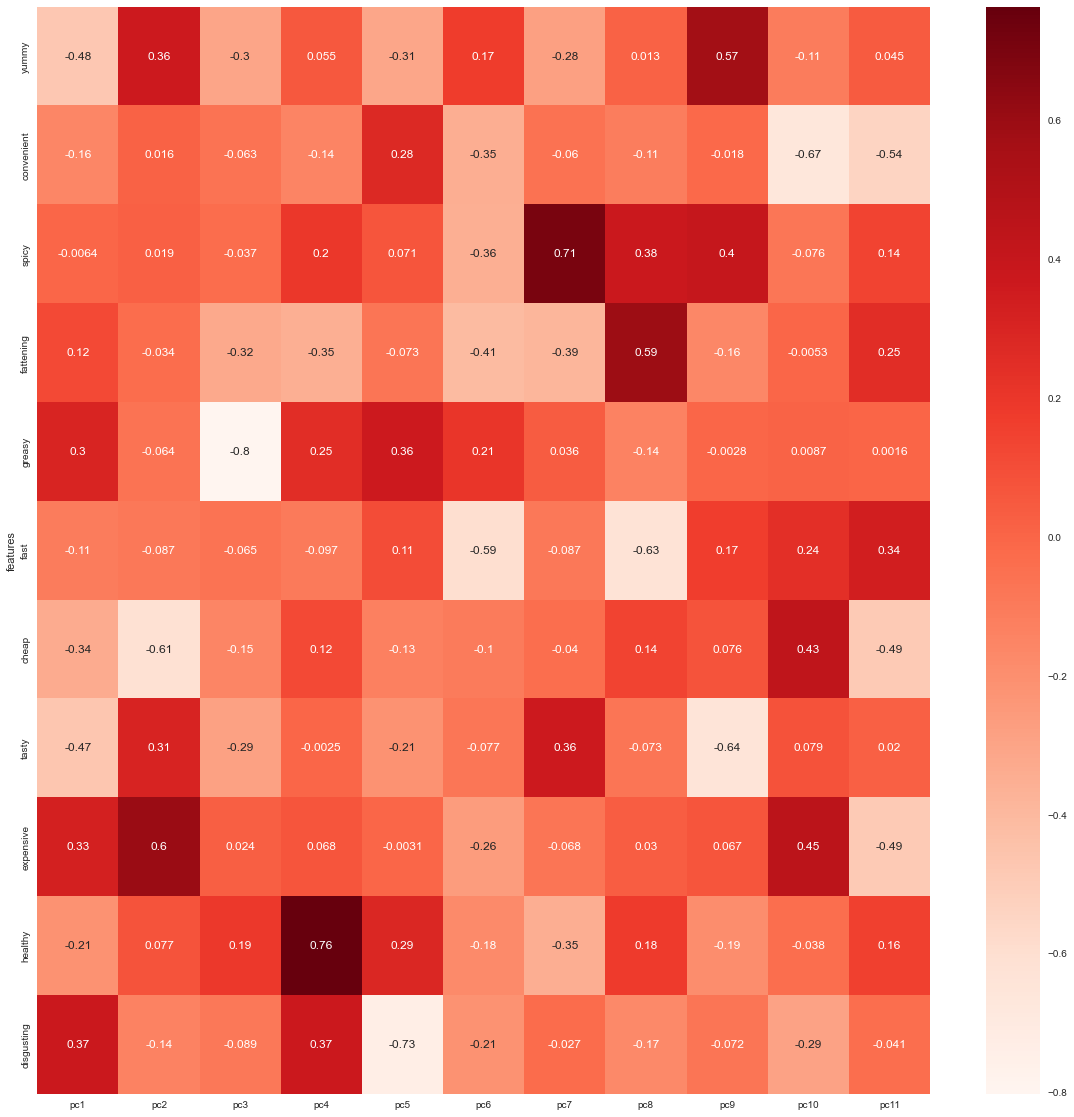

In [24]:
# Visualizing the above matrix

plt.figure(figsize = (20,20))
sns.heatmap(loading_df, annot = True, cmap = "Reds")
plt.show();

In [25]:
# Get PC Score
pca_scores = PCA().fit_transform(df_new)
pca_scores

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

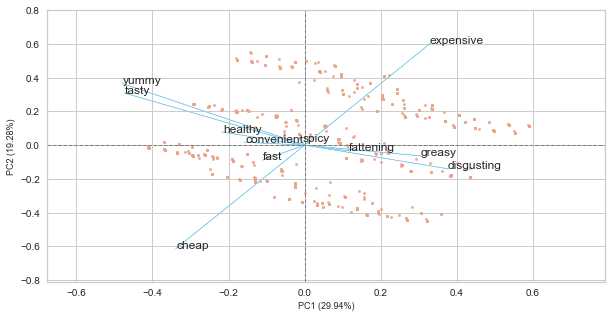

In [26]:
# Get 2d biplot
cluster.biplot(cscore = pca_scores, 
               loadings = loadings, 
              labels = df.columns.values, 
              var1 = round(pca.explained_variance_ratio_[0]*100, 2), 
              var2 = round(pca.explained_variance_ratio_[1]*100, 2), 
              show = True, 
              dim = (10,5))

# Applying The Elbo Method

In [27]:
# Using k-means clustering analysis for extracting segments 
wcss = []
for i in range(2, 9):
    model = KMeans(n_clusters = i)
    model.fit(df_new)
    wcss.append(model.inertia_)


In [28]:
wcss

[2145.503726917162,
 1818.700847441444,
 1603.0604440558945,
 1434.8577266592508,
 1331.9263389112862,
 1269.036756134289,
 1181.972519457702]

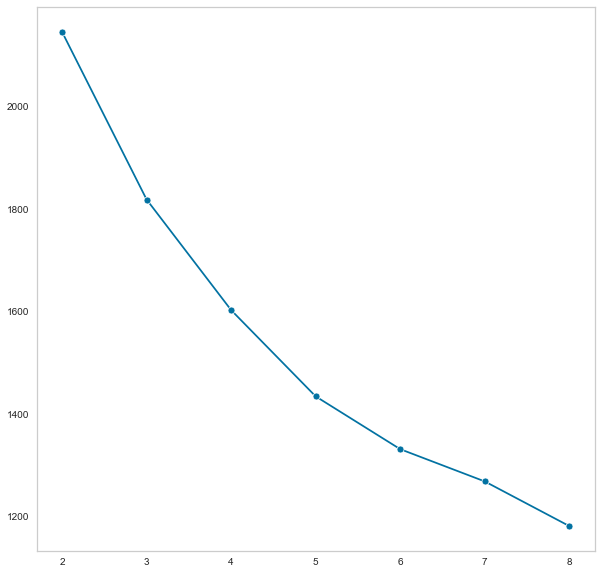

In [29]:
plt.figure(figsize = (10,10))
sns.lineplot(x = list(range(2,9)), y = wcss, marker = "o")
plt.grid()
plt.show();

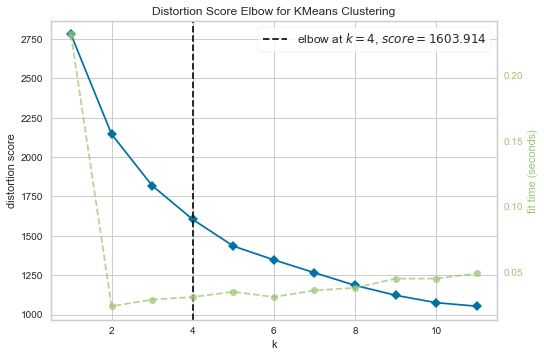

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
visualizer = KElbowVisualizer(KMeans(), k = (1,12))
visualizer.fit(df_new)
visualizer.show()

# Applying the K-means Clustering Algorithm

In [31]:
# k-means clustering
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(df_new)

KMeans(n_clusters=4, random_state=42)

In [32]:
df["Cluster_name"] = km.labels_

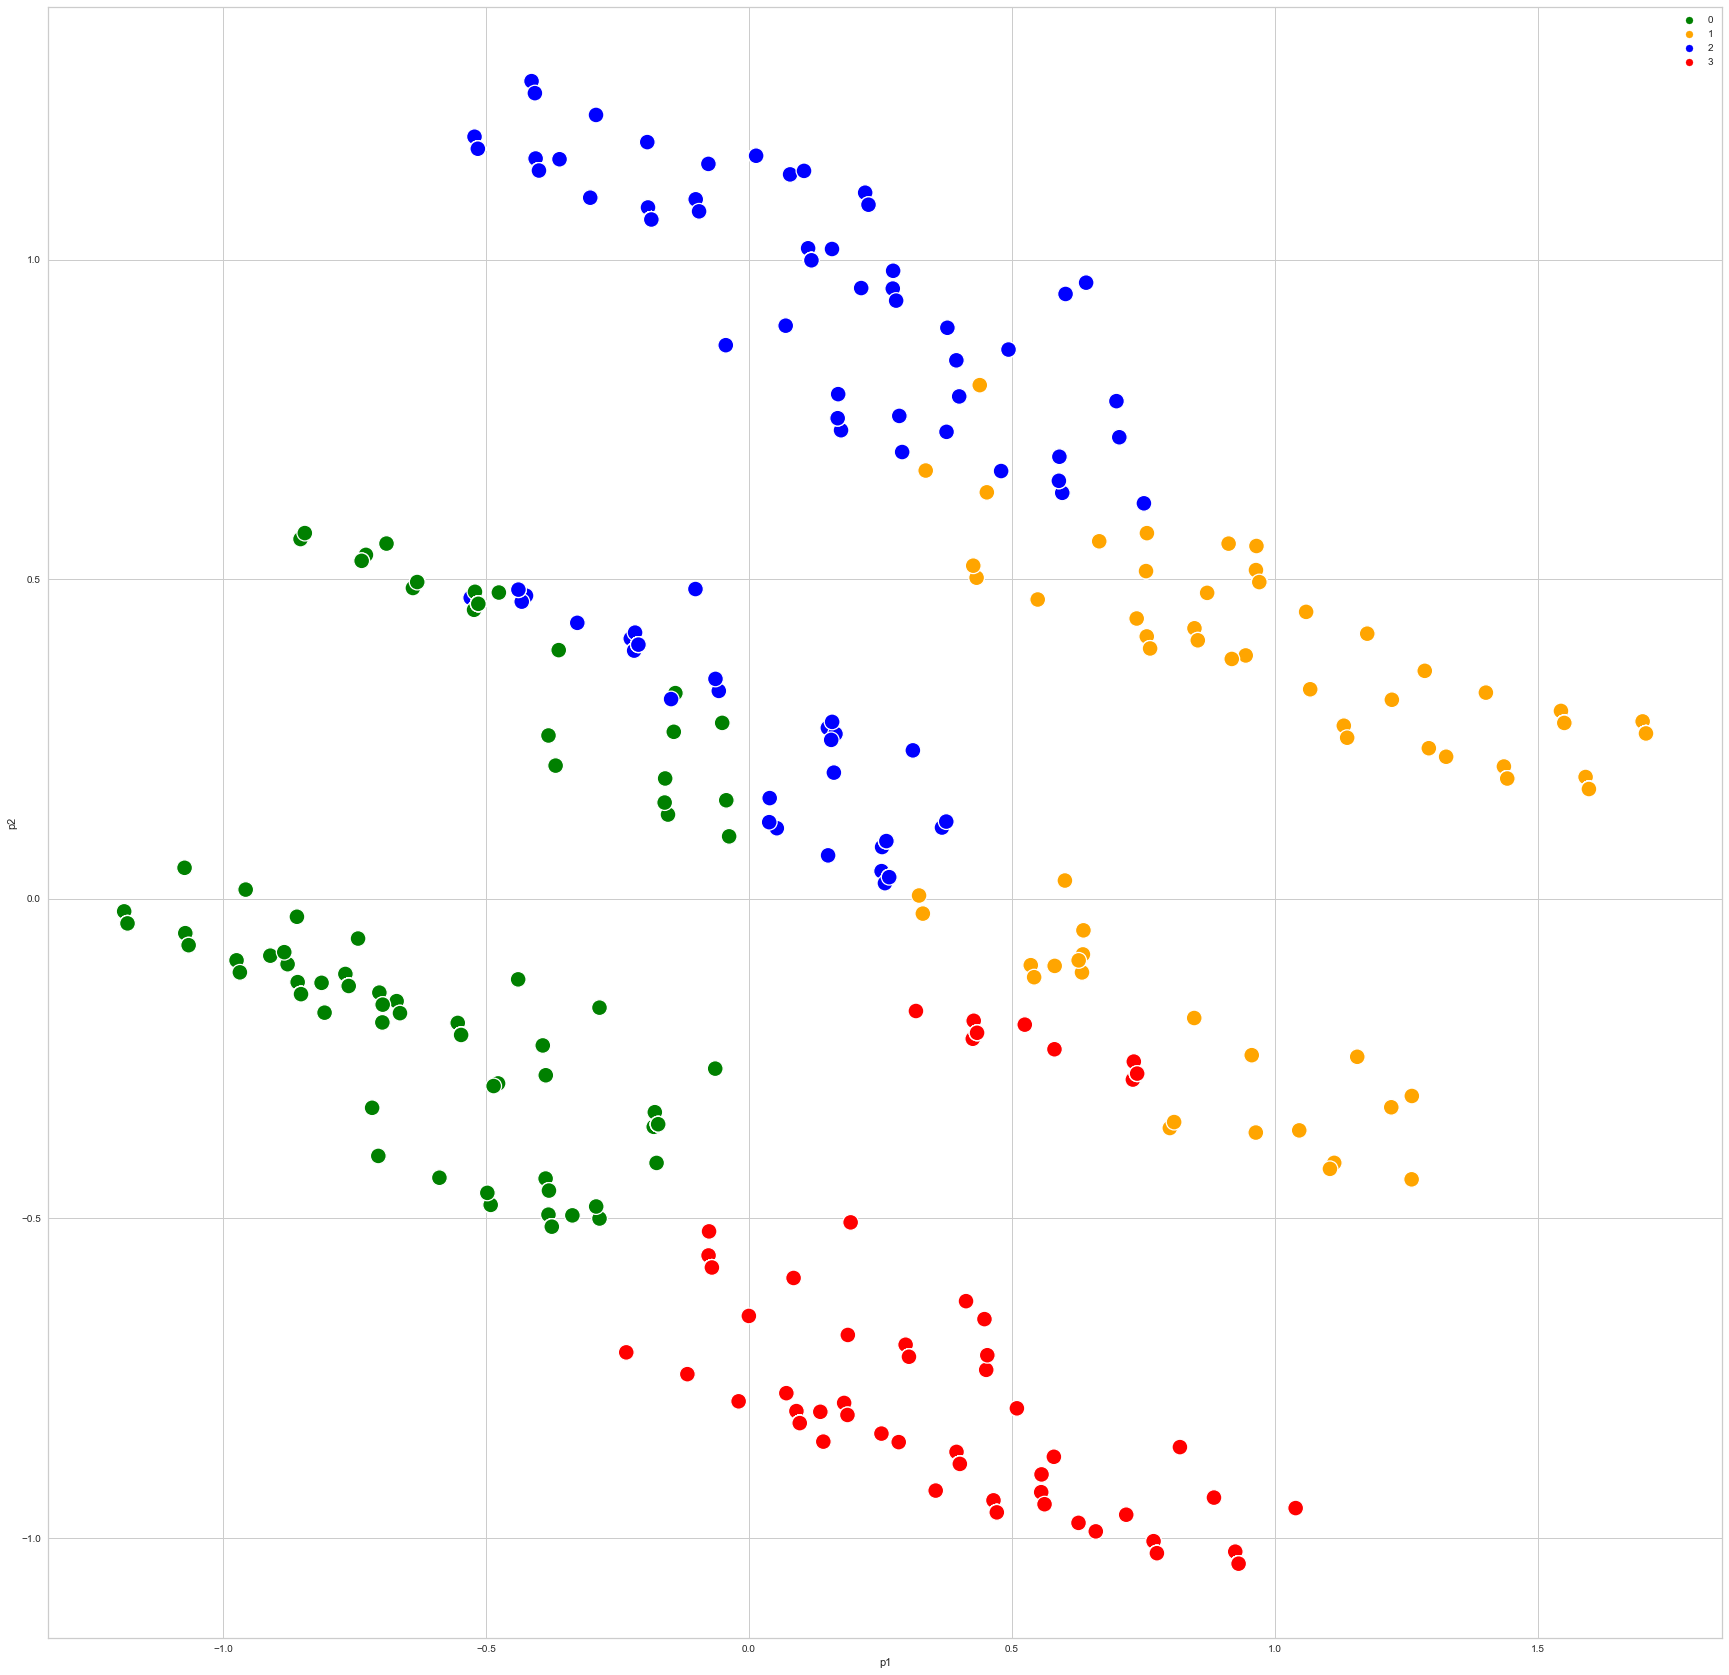

In [33]:
# cluster Visualization 
plt.figure(figsize = (30,30))
sns.scatterplot(pf["p1"], pf["p2"], hue = km.labels_, s = 250, palette=['green','orange','blue','red'])
plt.legend()
plt.show()

# Describing Segments

for Like

In [34]:
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

In [35]:
# crosstab 
crosstab = pd.crosstab(df["Cluster_name"], df["Like"])

In [36]:
crosstab

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
Cluster_name,,,,,,,,,,,
0,65,90,143,111,99,13,6,2,4,4,43
1,14,6,8,0,0,13,19,30,28,89,39
2,42,60,66,47,44,7,6,7,3,5,36
3,31,31,12,2,0,25,28,34,36,54,51


In [37]:
crosstab = crosstab[["-5", "-4", "-3", "-2", "-1", "+1", "+2", "+3", "+4", "+5"]]
crosstab

Like,-5,-4,-3,-2,-1,+1,+2,+3,+4,+5
Cluster_name,,,,,,,,,,
0,4,4,2,6,13,65,90,143,111,99
1,89,28,30,19,13,14,6,8,0,0
2,5,3,7,6,7,42,60,66,47,44
3,54,36,34,28,25,31,31,12,2,0


<Figure size 720x720 with 0 Axes>

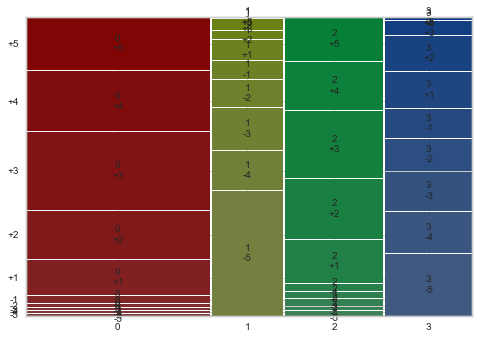

In [38]:
# plotting mosaic plot
plt.figure(figsize = (10,10))
mosaic(crosstab.stack())
plt.show();

for gender

In [39]:
crosstab_g = pd.crosstab(df["Cluster_name"], df["Gender"])
crosstab_g

Gender,Female,Male
Cluster_name,,
0,349,231
1,106,140
2,154,169
3,179,125


<Figure size 720x720 with 0 Axes>

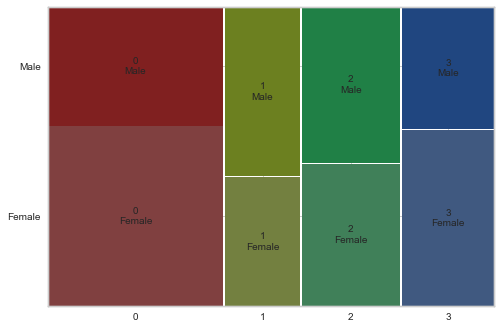

In [40]:
# plotting mosaic plot
plt.figure(figsize = (10,10))
mosaic(crosstab_g.stack())
plt.show();

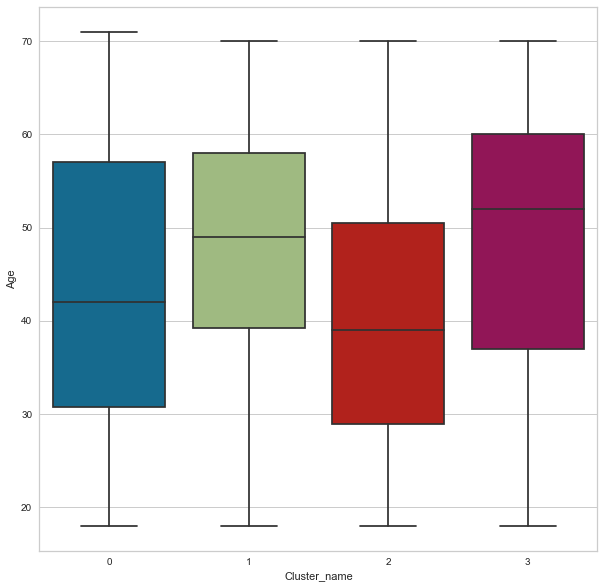

In [41]:
# box plot for "Age"

plt.figure(figsize = (10,10))
sns.boxplot(df["Cluster_name"], df["Age"])
plt.show();

In [42]:
df_seg = df.iloc[:, 11:16]
df_seg

,Like,Age,VisitFrequency,Gender,Cluster_name
0,-3,61,Every three months,Female,3
1,+2,51,Every three months,Female,2
2,+1,62,Every three months,Female,2
3,+4,69,Once a week,Female,0
4,+2,49,Once a month,Male,3
...,...,...,...,...,...
1448,-5,47,Once a year,Male,1
1449,+2,36,Once a week,Female,0
1450,+3,52,Once a month,Female,2
1451,+4,41,Every three months,Male,0


In [43]:
df_seg.drop("Age", axis = 1, inplace = True)

oe = OrdinalEncoder()
df_seg[["Like", "VisitFrequency", "Gender"]] = oe.fit_transform(df_seg[["Like", "VisitFrequency", "Gender"]])
df_seg.head()

,Like,VisitFrequency,Gender,Cluster_name
0,7.0,0.0,0.0,3
1,1.0,0.0,0.0,2
2,0.0,0.0,0.0,2
3,3.0,4.0,0.0,0
4,1.0,3.0,1.0,3


In [44]:
segment = df_seg.pivot_table(df_seg, index = ["Cluster_name"], aggfunc = "mean")

In [45]:
segment

,Gender,Like,VisitFrequency
Cluster_name,,,
0,0.398276,2.962069,2.584483
1,0.569106,7.422764,2.654472
2,0.523220,3.275542,2.547988
3,0.411184,6.171053,2.822368


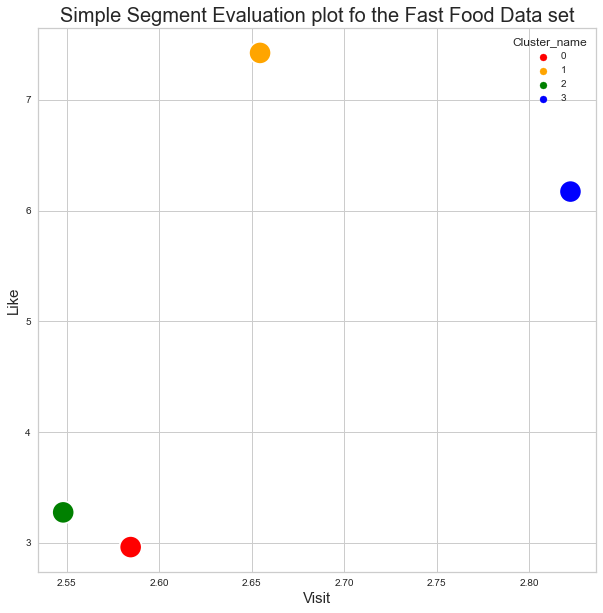

In [46]:
# targetting segments 
plt.figure(figsize = (10,10))
sns.scatterplot(x = "VisitFrequency", 
               y = "Like", 
               data = segment, 
               s = 500, 
               hue = "Cluster_name", 
               palette = ["Red", "Orange", "Green", "Blue"])
plt.title("Simple Segment Evaluation plot fo the Fast Food Data set", fontsize = 20)
plt.xlabel("Visit", fontsize = 15)
plt.ylabel("Like", fontsize = 15)
plt.show();